다변량 시각화
 - 두개 이상의 변수로 구성된 데이터의 관계를 시각화 기반으로 파악
 - 주어진 변수 간의 패턴 및 관계를 다양한 그래프로 시각화 

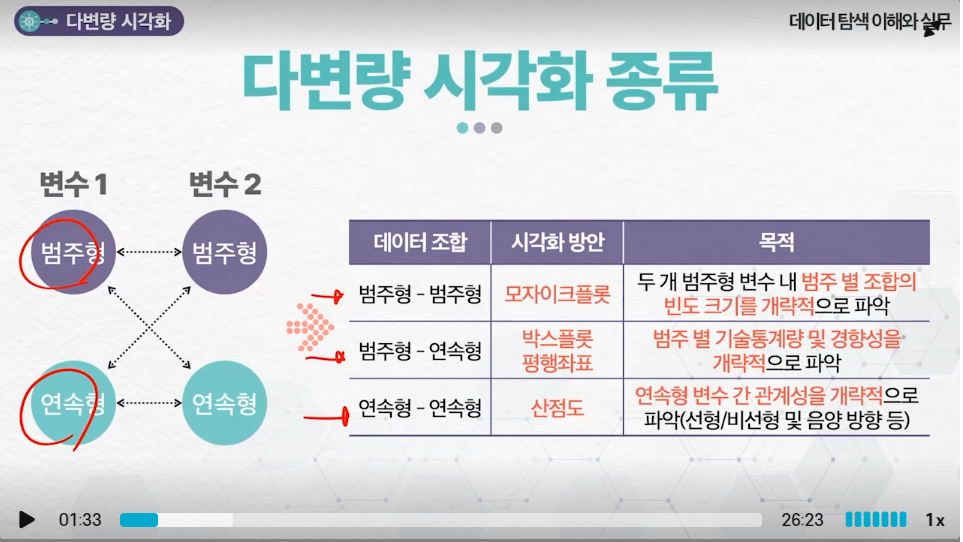

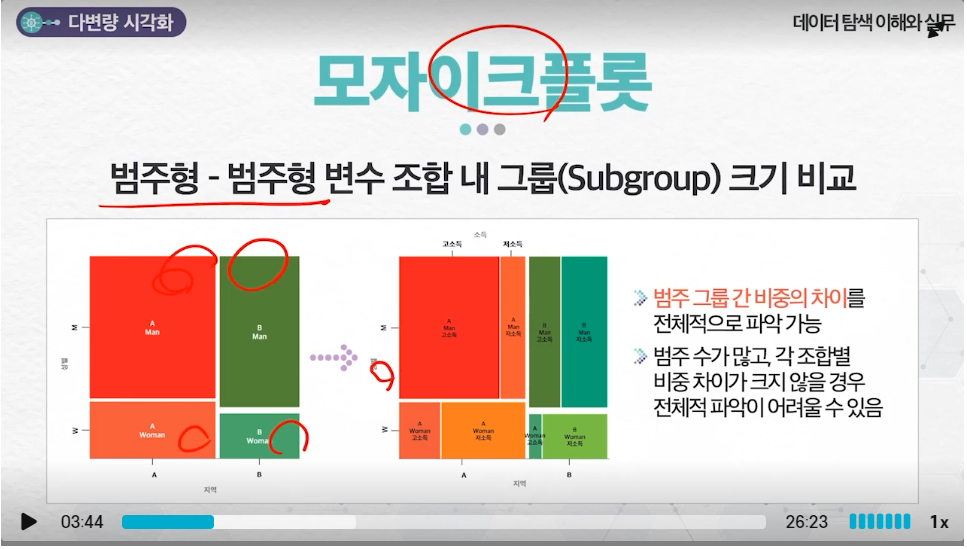
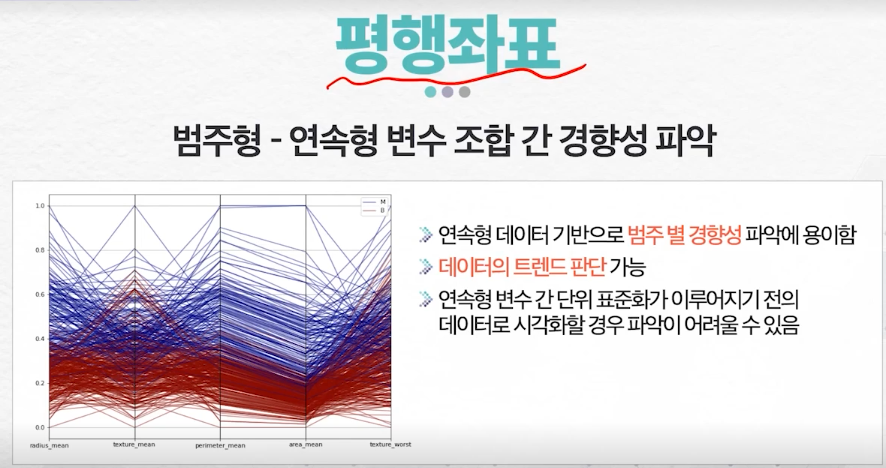
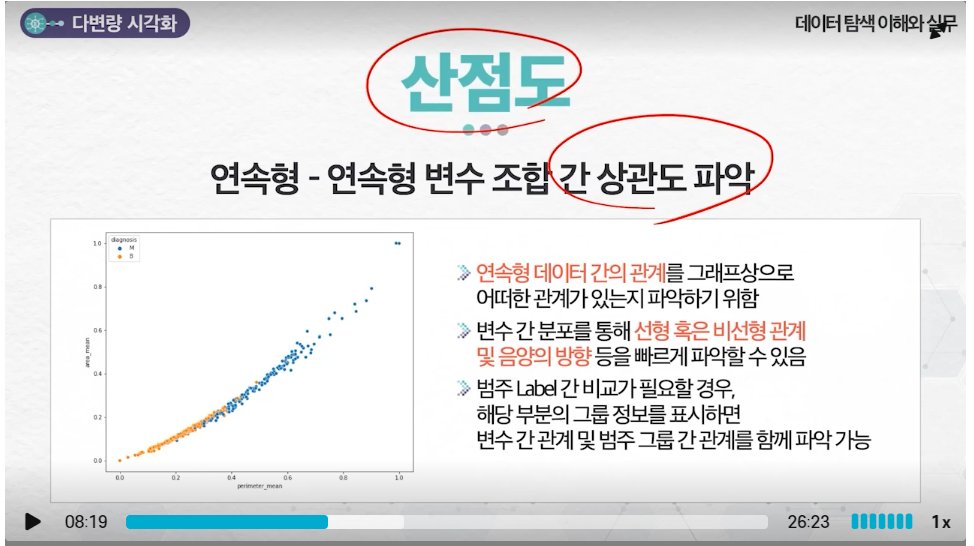

In [2]:
# 라이브러리 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 보스턴 자료 사용
data = pd.read_excel('D:/KTdata/boston.xls')
hdata = pd.DataFrame(data)
hdata.describe()

housing_data = hdata.copy()

In [4]:
#타겟변수인 주택가격 (MEDV) 범주화
#평균 가격 기반으로 고가, 저가 범주로 구분 
medv_bins = [0, np.mean(housing_data['MEDV']),np.max(housing_data['MEDV'])]
medv_names = ['cheap','expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'],medv_bins,labels=medv_names )

#(INDUS) 범주화
# INDUS_LOW: 비소매 사업 지억 비율이 낮음 
# INDUS_HIGHT: 비소매 사업 지억 비율이 높음 
indus_bins = [0, np.mean(housing_data['INDUS']),np.max(housing_data['INDUS'])]
indus_names = ['INDUS_LOW','INDUS_HIGHT']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'],indus_bins,labels=indus_names )

# RAD 범주화 
# RAD_LOW : 고속도로의 접근성 지수가 낮음
# RAD_HIGH: 고속도로의 접근성 지수가 높음

rad_bins = [0, np.mean(housing_data['RAD']),np.max(housing_data['RAD'])]
rad_names = ['RAD_LOW','RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'],rad_bins,labels=rad_names )


In [5]:
# 모자이크 플롯 시각화 패키지 로딩
from statsmodels.graphics.mosaicplot import mosaic


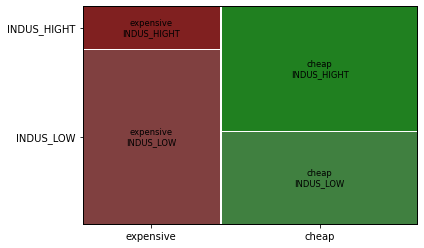

In [6]:
# 2개 범주 시각화 
# 타깃변수 주택가격 범주와 INDUS 범주 간 모자이크 플롯
mosaic(housing_data, ['MEDV_G','INDUS_G'])
plt.show()

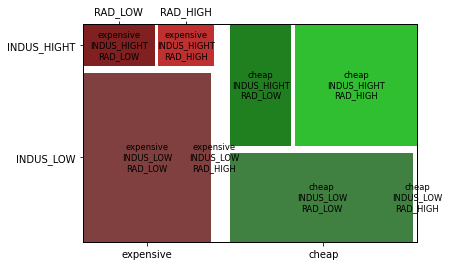

In [7]:
# 3개 범주 시각화 
# 타깃변수 주택가격과 비상업지구 정도 및 고속도로 접근성 범주 간 모자이크 플롯
mosaic(housing_data, ['MEDV_G','INDUS_G','RAD_G'],gap=0.05)
plt.show()

범주형 - 연속형 다변량 시각화
- 박스플롯
- 평행좌표
    - 범주 별 요약통계량 및 결합성을 개략적으로 파악을 위한 시각화

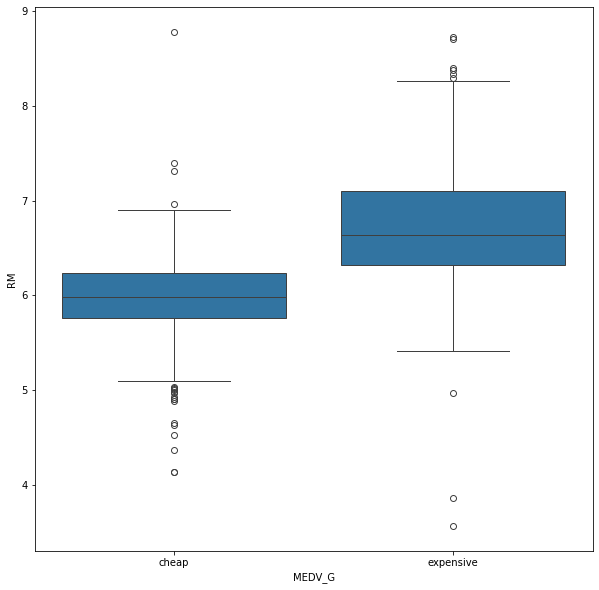

In [8]:
# Boxplot 시각화
# 주택 가격 범주 및 평균 방의 개수 요약 통계량 도출

plt.figure(figsize=(10,10))
sns.boxplot(data=housing_data,x='MEDV_G',y='RM')
plt.show()

- 주택 가격 범주 및 평균 방의 개수는 , 주택가격이 평균대비 높은 지역들보다 중앙값을 비롯하여 전반적으로 낮음 

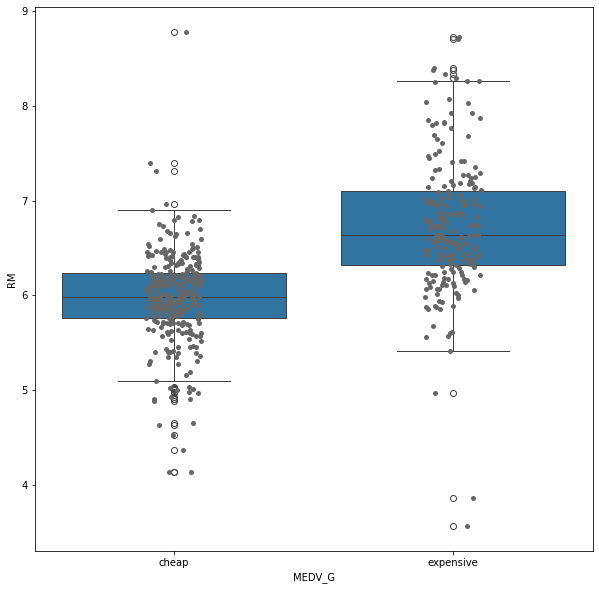

In [9]:
# Boxplot 시각화
# 데이터 관측치별 point 추가 

plt.figure(figsize=(10,10))
sns.boxplot(data=housing_data,x='MEDV_G',y='RM')
sns.stripplot(x='MEDV_G',y='RM',data=housing_data,color="0.4")
plt.show()

In [10]:
# 평행좌표 실습 패키지 
from pandas.plotting import parallel_coordinates

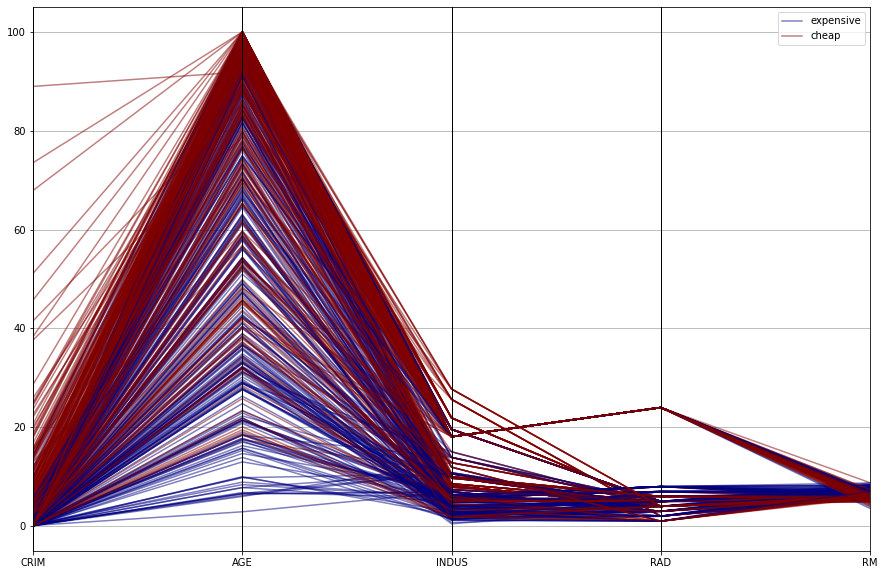

In [11]:
# 데이터 일부 선택
sub_data = housing_data[['CRIM','AGE','INDUS','RAD','RM','MEDV_G']]

# 평행좌표 실습
plt.figure(figsize=(15,10))
parallel_coordinates(sub_data,'MEDV_G',colormap=plt.get_cmap('jet'),alpha=0.5)
plt.show()

- 주택 가격이 낮을수록 
    - 범죄율이 높음
    - 오래된 주택이 많음
    - 방의 개수가 적음 

- 컬럼별 범위가 서로 다르기 때문에, min-max 스캐일링 필요

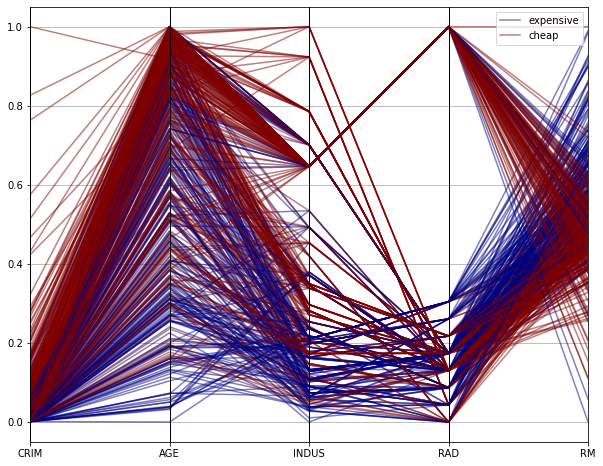

In [13]:
#데이터 값의 위치를 파악할 수 있는 Min-max scaling 변환 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_df = sub_data[['CRIM','AGE','INDUS','RAD','RM']]
x_norm = pd.DataFrame(scaler.fit_transform(x_df), columns =['CRIM','AGE','INDUS','RAD','RM'])

sub_data_scale = pd.merge(x_norm,sub_data[['MEDV_G']], left_index=True , right_index=True, how="inner")

# Scaling 한 데이터로 평행좌표 실습
plt.figure(figsize=(10,8))
parallel_coordinates(sub_data_scale, 'MEDV_G',colormap=plt.get_cmap('jet'), alpha = 0.5)
plt.show()

- 주택 평균 가격이 낮은 경우의 경향 요약(자주색)
1. 범죄율이 높음
2. 오래된 주택이 맞ㅎ음
3. 상업지역의 비중이 작음
4. 고속도로 접근성 지수가 높음
5. 방의 개수가 적음 

연속형-연속형 다변량 시각화
- 산점도
    - 연속형 변수 간 관계를 계략적으로 파악하기 위한 시각화 
    - 변수 간 선형성 및 양과 음의 관계성 등을 파악 가능 

In [14]:
housing_data = hdata.copy()
# 데이터 설명에 따라 CHAS 컬럼을 변수형 데이터로 변환 
housing_data = housing_data.astype({'CHAS':'object'})

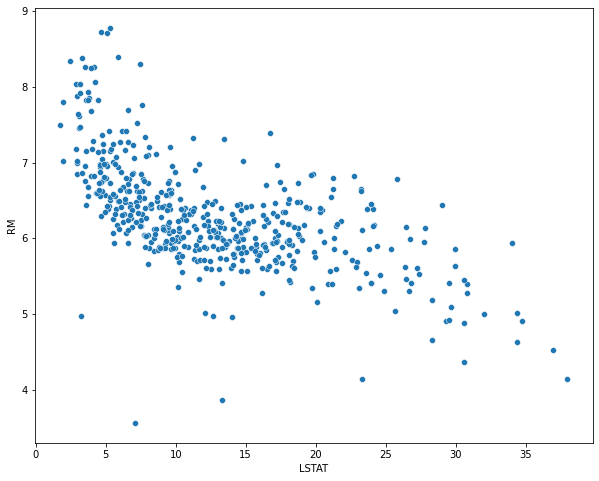

In [15]:
# 하위 계층 비율과 평균 방의 개수간 상관관계 확인
plt.figure(figsize=(10,8))
sns.scatterplot(x='LSTAT', y = 'RM', data=housing_data)
plt.show()

In [16]:
import scipy.stats as stats
stats.pearsonr(housing_data.LSTAT, housing_data.RM)

PearsonRResult(statistic=-0.6138082718663955, pvalue=1.0330091329658455e-53)

- 방의 개수가 적을수록 하위계층의 비율이 높음 >> 음의 상관관계
- 약간의 선형관계성을 보이며 일부 잠재적 이상치가 존재


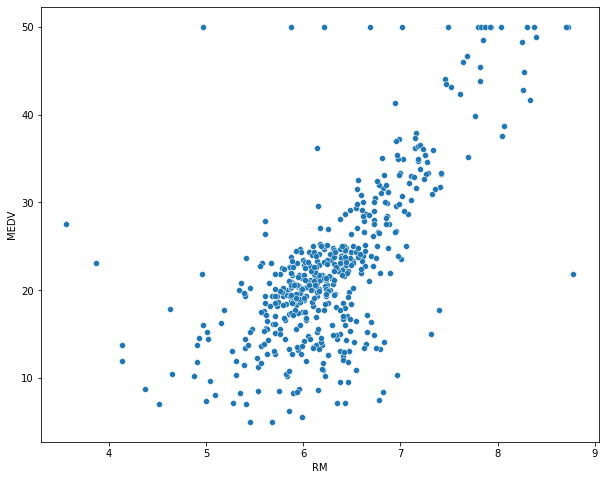

In [18]:
# 평균 방의 개수 및 주택가격 간 상관관계 확인
plt.figure(figsize=(10,8))
sns.scatterplot(x='RM',y="MEDV",data=housing_data)
plt.show()

- 방의 개수가 많을수록 주택 가격이 높아짐 >> 양의 상관관계
- 대체로 선형관계성을 보이나 일부 잠재적 이상치가 존재

In [19]:
stats.pearsonr(housing_data.MEDV, housing_data.RM)

PearsonRResult(statistic=0.6953599470715394, pvalue=2.487228871008081e-74)

### 다야안 상관관계의 정도를 시각화하는 방안 : HeatMap
    - 본래 Heatmap은 범주형 자료의 범주별로 연속한 자료를 집계한 자료를 사용하여 , 집계한 값에 비례하여 색을 다르게 해서 2차원으로 자료를 시각화 
    

In [20]:
# 모든 컬럼 간 상관관계 도출
#4.3 e다변량 비시각화 교안 참고
- np.round(housing_data.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,-1.00,0.20,-0.41,0.06,-0.42,0.22,-0.35,0.38,-0.63,-0.58,-0.29,0.39,-0.46,0.39,0.15
ZN,0.20,-1.00,0.53,0.04,0.52,-0.31,0.57,-0.66,0.31,0.31,0.39,-0.18,0.41,-0.36,-0.37
INDUS,-0.41,0.53,-1.00,-0.06,-0.76,0.39,-0.64,0.71,-0.60,-0.72,-0.38,0.36,-0.60,0.48,0.37
CHAS,0.06,0.04,-0.06,-1.00,-0.09,-0.09,-0.09,0.10,0.01,0.04,0.12,-0.05,0.05,-0.18,-0.11
NOX,-0.42,0.52,-0.76,-0.09,-1.00,0.30,-0.73,0.77,-0.61,-0.67,-0.19,0.38,-0.59,0.43,0.23
RM,0.22,-0.31,0.39,-0.09,0.30,-1.00,0.24,-0.21,0.21,0.29,0.36,-0.13,0.61,-0.70,-0.64
AGE,-0.35,0.57,-0.64,-0.09,-0.73,0.24,-1.00,0.75,-0.46,-0.51,-0.26,0.27,-0.60,0.38,0.19
DIS,0.38,-0.66,0.71,0.10,0.77,-0.21,0.75,-1.00,0.49,0.53,0.23,-0.29,0.50,-0.25,-0.12
RAD,-0.63,0.31,-0.60,0.01,-0.61,0.21,-0.46,0.49,-1.00,-0.91,-0.46,0.44,-0.49,0.38,0.20
TAX,-0.58,0.31,-0.72,0.04,-0.67,0.29,-0.51,0.53,-0.91,-1.00,-0.46,0.44,-0.54,0.47,0.27


- N x N 개의 맵이 생성, 상관관계 파악이 이려움 
- 히트맵: 다변량 데이터간 상관관계를 더 알기쉽게 표현

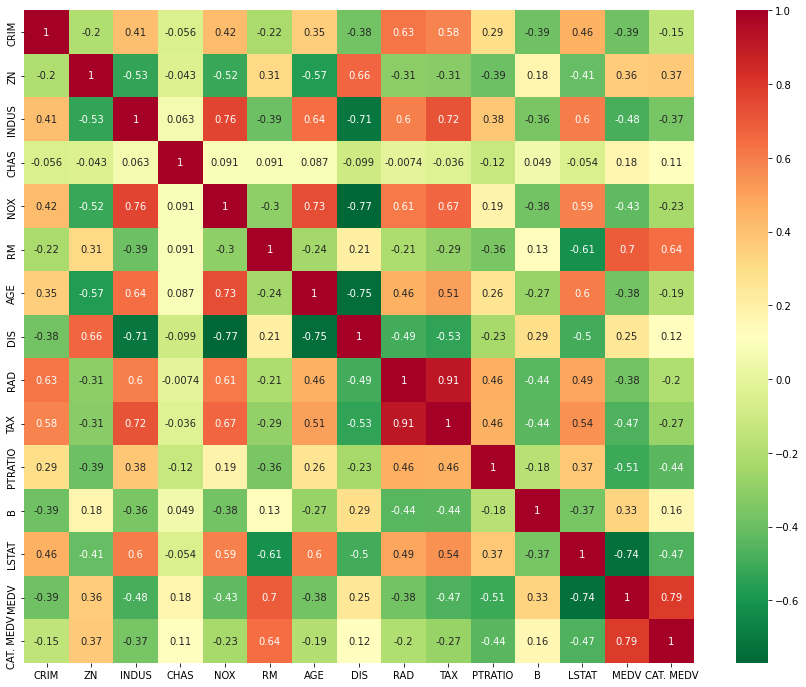

In [24]:
# 상관계수 데이터프레임을 Heatmap으로 시각화
plt.figure(figsize=(15,12))
sns.heatmap(housing_data.corr(),annot=True, cmap='RdYlGn_r')
plt.show()